# Final Project

## Analyze and advice on a Client´s portfolio

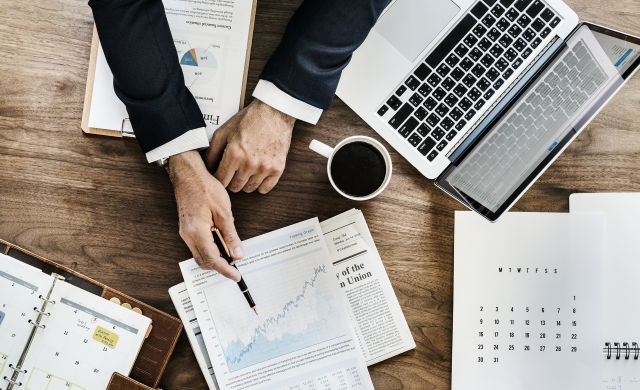

### The Case

It´s your first day as Financial Analyst in an Asset Management Firm that manages the Portfolios of High Net Worth Individuals (HNWI). <br><br>
Your Boss recently solicited a new Client, Mary Johnson, 65 years old. Marie recently retired after 30 Years as an independent physician. Her husband died soon and bequeathed a considerable Investment Portfolio to her. <br><br>
From 1997 until today she has been solely invested into __5 Health Care Stocks__, that are today the __most valuable__ Health Care Stocks in the US Market in terms of __Market Capitalization__. She strongly believes that it´s best to only invest into sectors where she has specific industry expertise (Health Care). She only trusts the largest and best-known companies in the market. Her Strategy has been pretty simple: Buying an __equal number of shares__ of each Stock and __reinvesting all dividends__ (assume no costs and taxes). <br> <br> 
Now that she has retired with no active work income (she needs to live from her Investment Portfolio), Mary decided to make her portfolio more suitable to the new situation. In a very first step, she agreed with your boss to sell parts of her five-Stocks Portfolio and invest into lower risk Government Bonds and high-quality Corporate Bonds.   <br> <br>
Now, as a next second step, it´s your task to guide her into a __more diversified Stock Portfolio that better reflects Modern Portfolio Theory__.   

---------------------------------------------------------------------

### Step 1: Identify the five stocks and get the respective Stock Tickers!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cufflinks as cf

plt.style.use("seaborn")
pd.options.display.float_format = '{:.3f}'.format

In [3]:
listings = pd.read_csv("listings_clean.csv", index_col = "Symbol")

In [4]:
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.680,25934696179.920,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.150,5407809589.600,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.390,42781131315.300,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.160,53141086.800,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.020,15276869742.960,1969,Transportation,Air Freight/Delivery Services


In [5]:
listings.tail()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
ZUMZ,NASDAQ,Zumiez Inc.,26.720,681919062.560,2005,Consumer Services,Clothing/Shoe/Accessory Stores
ZUO,NYSE,"Zuora, Inc.",19.790,2147266454.000,2018,Technology,Computer Software: Prepackaged Software
ZYME,NYSE,Zymeworks Inc.,15.740,504078206.260,2017,Health Care,Major Pharmaceuticals
ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.850,165399468.600,2015,Health Care,Major Pharmaceuticals
ZYXI,NASDAQ,"Zynex, Inc.",5.020,161834880.480,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


In [7]:
health = listings.loc[listings.Sector == "Health Care"].copy()

In [8]:
large_cap_hea = health.nlargest(n = 5, columns = "Market_Cap")

In [9]:
large_cap_hea

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
JNJ,NYSE,Johnson & Johnson,135.580,361018644165.180,1969,Health Care,Major Pharmaceuticals
PFE,NYSE,"Pfizer, Inc.",42.730,237228618676.700,1969,Health Care,Major Pharmaceuticals
UNH,NYSE,UnitedHealth Group Incorporated,246.030,236075260845.450,1969,Health Care,Medical Specialities
MRK,NYSE,"Merck & Company, Inc.",80.820,208764129420.360,1969,Health Care,Major Pharmaceuticals
NVS,NYSE,Novartis AG,81.930,189354275177.970,1969,Health Care,Major Pharmaceuticals


In [10]:
ticker = large_cap_hea.index.to_list()

In [11]:
ticker

['JNJ', 'PFE', 'UNH', 'MRK', 'NVS']

--------------------

### Step 2: Create an appropriate Index from 1997 (start with 1996-12-31) until the end of 2018 that best reflects her strategy and create a normalized Price Chart (with Base Value 100 on 1996-12-31)!

In [12]:
start = "1997-01-01"
end = "2018-12-31"

In [13]:
stocks = yf.download(ticker, start = start, end = end)[["Adj Close", "Close"]]

[*********************100%***********************]  5 of 5 completed


In [14]:
stocks

Adj Close                                Close                \
                 JNJ    MRK    NVS    PFE     UNH     JNJ    MRK    NVS   
Date                                                                      
1996-12-31    14.105 17.488 12.565  6.679   4.723  24.875 39.812 25.762   
1997-01-02    14.105 17.543 12.483  6.589   4.749  24.875 39.938 25.594   
1997-01-03    14.247 18.147 12.402  6.730   4.880  25.125 41.312 25.426   
1997-01-06    14.353 18.202 12.374  6.699   4.893  25.312 41.438 25.370   
1997-01-07    14.388 18.229 12.402  6.800   4.906  25.375 41.500 25.426   
...              ...    ...    ...    ...     ...     ...    ...    ...   
2018-12-21   122.124 69.326 69.812 39.242 231.411 128.090 72.900 74.686   
2018-12-24   117.118 67.662 69.092 37.950 226.168 122.840 71.150 73.916   
2018-12-26   120.808 70.372 71.001 39.485 236.276 126.710 74.000 75.959   
2018-12-27   121.476 71.684 70.415 40.103 238.819 127.410 75.380 75.332   
2018-12-28   121.342 71.675 71.412 40.206 239.082 127.270 75.370 76.398   

                           
              PFE     UNH  
Date                       
1996-12-31 13.833   5.625  
1997-01-02 13.646   5.656  
1997-01-03 13.938   5.812  
1997-01-06 13.875   5.828  
1997-01-07 14.083   5.844  
...           ...     ...  
2018-12-21 41.930 238.340  
2018-12-24 40.550 232.940  
2018-12-26 42.190 243.350  
2018-12-27 42.850 245.970  
2018-12-28 42.960 246.240  

[5536 rows x 10 columns]

In [16]:
weights = stocks.Close.div(stocks.Close.sum(axis = 1), axis = "index")

In [17]:
weights

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1996-12-31,0.226,0.362,0.234,0.126,0.051
1997-01-02,0.227,0.364,0.233,0.124,0.052
1997-01-03,0.225,0.370,0.228,0.125,0.052
1997-01-06,0.226,0.371,0.227,0.124,0.052
1997-01-07,0.226,0.370,0.227,0.125,0.052
...,...,...,...,...,...
2018-12-21,0.230,0.131,0.134,0.075,0.429
2018-12-24,0.227,0.131,0.137,0.075,0.430
2018-12-26,0.225,0.132,0.135,0.075,0.433


In [18]:
ret = stocks["Adj Close"].pct_change().dropna()

In [20]:
hea_index = ret.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [21]:
hea_index

Date
1997-01-02    99.819
1997-01-03   101.552
1997-01-06   101.743
1997-01-07   102.111
1997-01-08   101.662
               ...  
2018-12-21   868.100
2018-12-24   845.380
2018-12-26   877.879
2018-12-27   885.269
2018-12-28   887.293
Length: 5535, dtype: float64

In [22]:
hea_index[pd.to_datetime("1996-12-31")] = 100

In [23]:
hea_index

Date
1997-01-02    99.819
1997-01-03   101.552
1997-01-06   101.743
1997-01-07   102.111
1997-01-08   101.662
               ...  
2018-12-24   845.380
2018-12-26   877.879
2018-12-27   885.269
2018-12-28   887.293
1996-12-31   100.000
Length: 5536, dtype: float64

In [24]:
hea_index.sort_index(inplace = True)

In [25]:
hea_index

Date
1996-12-31   100.000
1997-01-02    99.819
1997-01-03   101.552
1997-01-06   101.743
1997-01-07   102.111
               ...  
2018-12-21   868.100
2018-12-24   845.380
2018-12-26   877.879
2018-12-27   885.269
2018-12-28   887.293
Length: 5536, dtype: float64

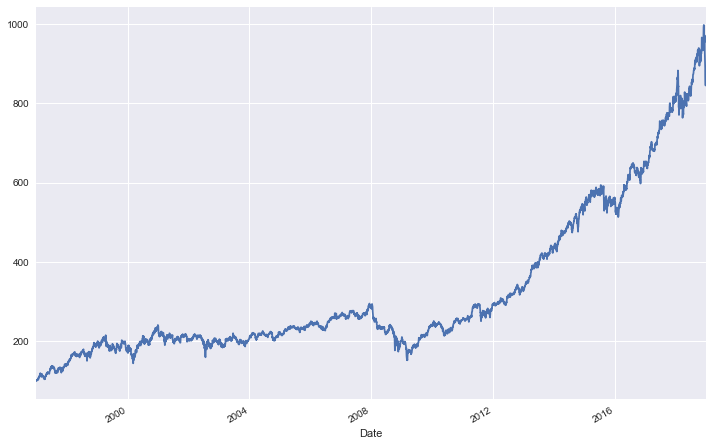

In [26]:
hea_index.plot(figsize = (12, 8))
plt.show()

--------------------

### Step 3: Verify the following statement that she made during the first meeting with your boss: "For investments periods of 6 years or longer, I never lost money with my portfolio!" Is she right? 

In [27]:
annual = hea_index.resample("A", kind = "period").last().to_frame()
annual

,0
Date,
1996,100.000
1997,142.069
1998,194.037
1999,176.906
2000,240.603
2001,205.085
2002,194.832
2003,210.639
2004,223.573


In [28]:
annual.columns = ["Price"]

In [29]:
annual["Return"] = np.log(annual.Price / annual.Price.shift())

In [30]:
annual.dropna(inplace = True)

In [31]:
annual

,Price,Return
Date,,
1997,142.069,0.351
1998,194.037,0.312
1999,176.906,-0.092
2000,240.603,0.308
2001,205.085,-0.160
2002,194.832,-0.051
2003,210.639,0.078
2004,223.573,0.060
2005,241.835,0.079


In [32]:
years = annual.index.size
years

22

In [33]:
windows = [year for year in range(years, 0, -1)]
windows

[22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [34]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [35]:
annual

,Price,Return,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,142.069,0.351,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.351
1998,194.037,0.312,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,0.331,0.312
1999,176.906,-0.092,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.190,0.110,-0.092
2000,240.603,0.308,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.219,0.176,0.108,0.308
2001,205.085,-0.160,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,0.144,0.092,0.018,0.074,-0.160
2002,194.832,-0.051,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,0.111,0.063,0.001,0.032,-0.106,-0.051
2003,210.639,0.078,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,0.106,0.066,0.016,0.044,-0.044,0.013,0.078
2004,223.573,0.060,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.101,0.065,0.024,0.047,-0.018,0.029,0.069,0.060
2005,241.835,0.079,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,0.098,0.066,0.031,0.052,0.001,0.041,0.072,0.069,0.079


In [36]:
triangle = annual.drop(columns = ["Price", "Return"])

In [37]:
triangle

,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,14Y,13Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.351
1998,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,0.331,0.312
1999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.190,0.110,-0.092
2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.219,0.176,0.108,0.308
2001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,0.144,0.092,0.018,0.074,-0.160
2002,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,0.111,0.063,0.001,0.032,-0.106,-0.051
2003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,0.106,0.066,0.016,0.044,-0.044,0.013,0.078
2004,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.101,0.065,0.024,0.047,-0.018,0.029,0.069,0.060
2005,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,0.098,0.066,0.031,0.052,0.001,0.041,0.072,0.069,0.079


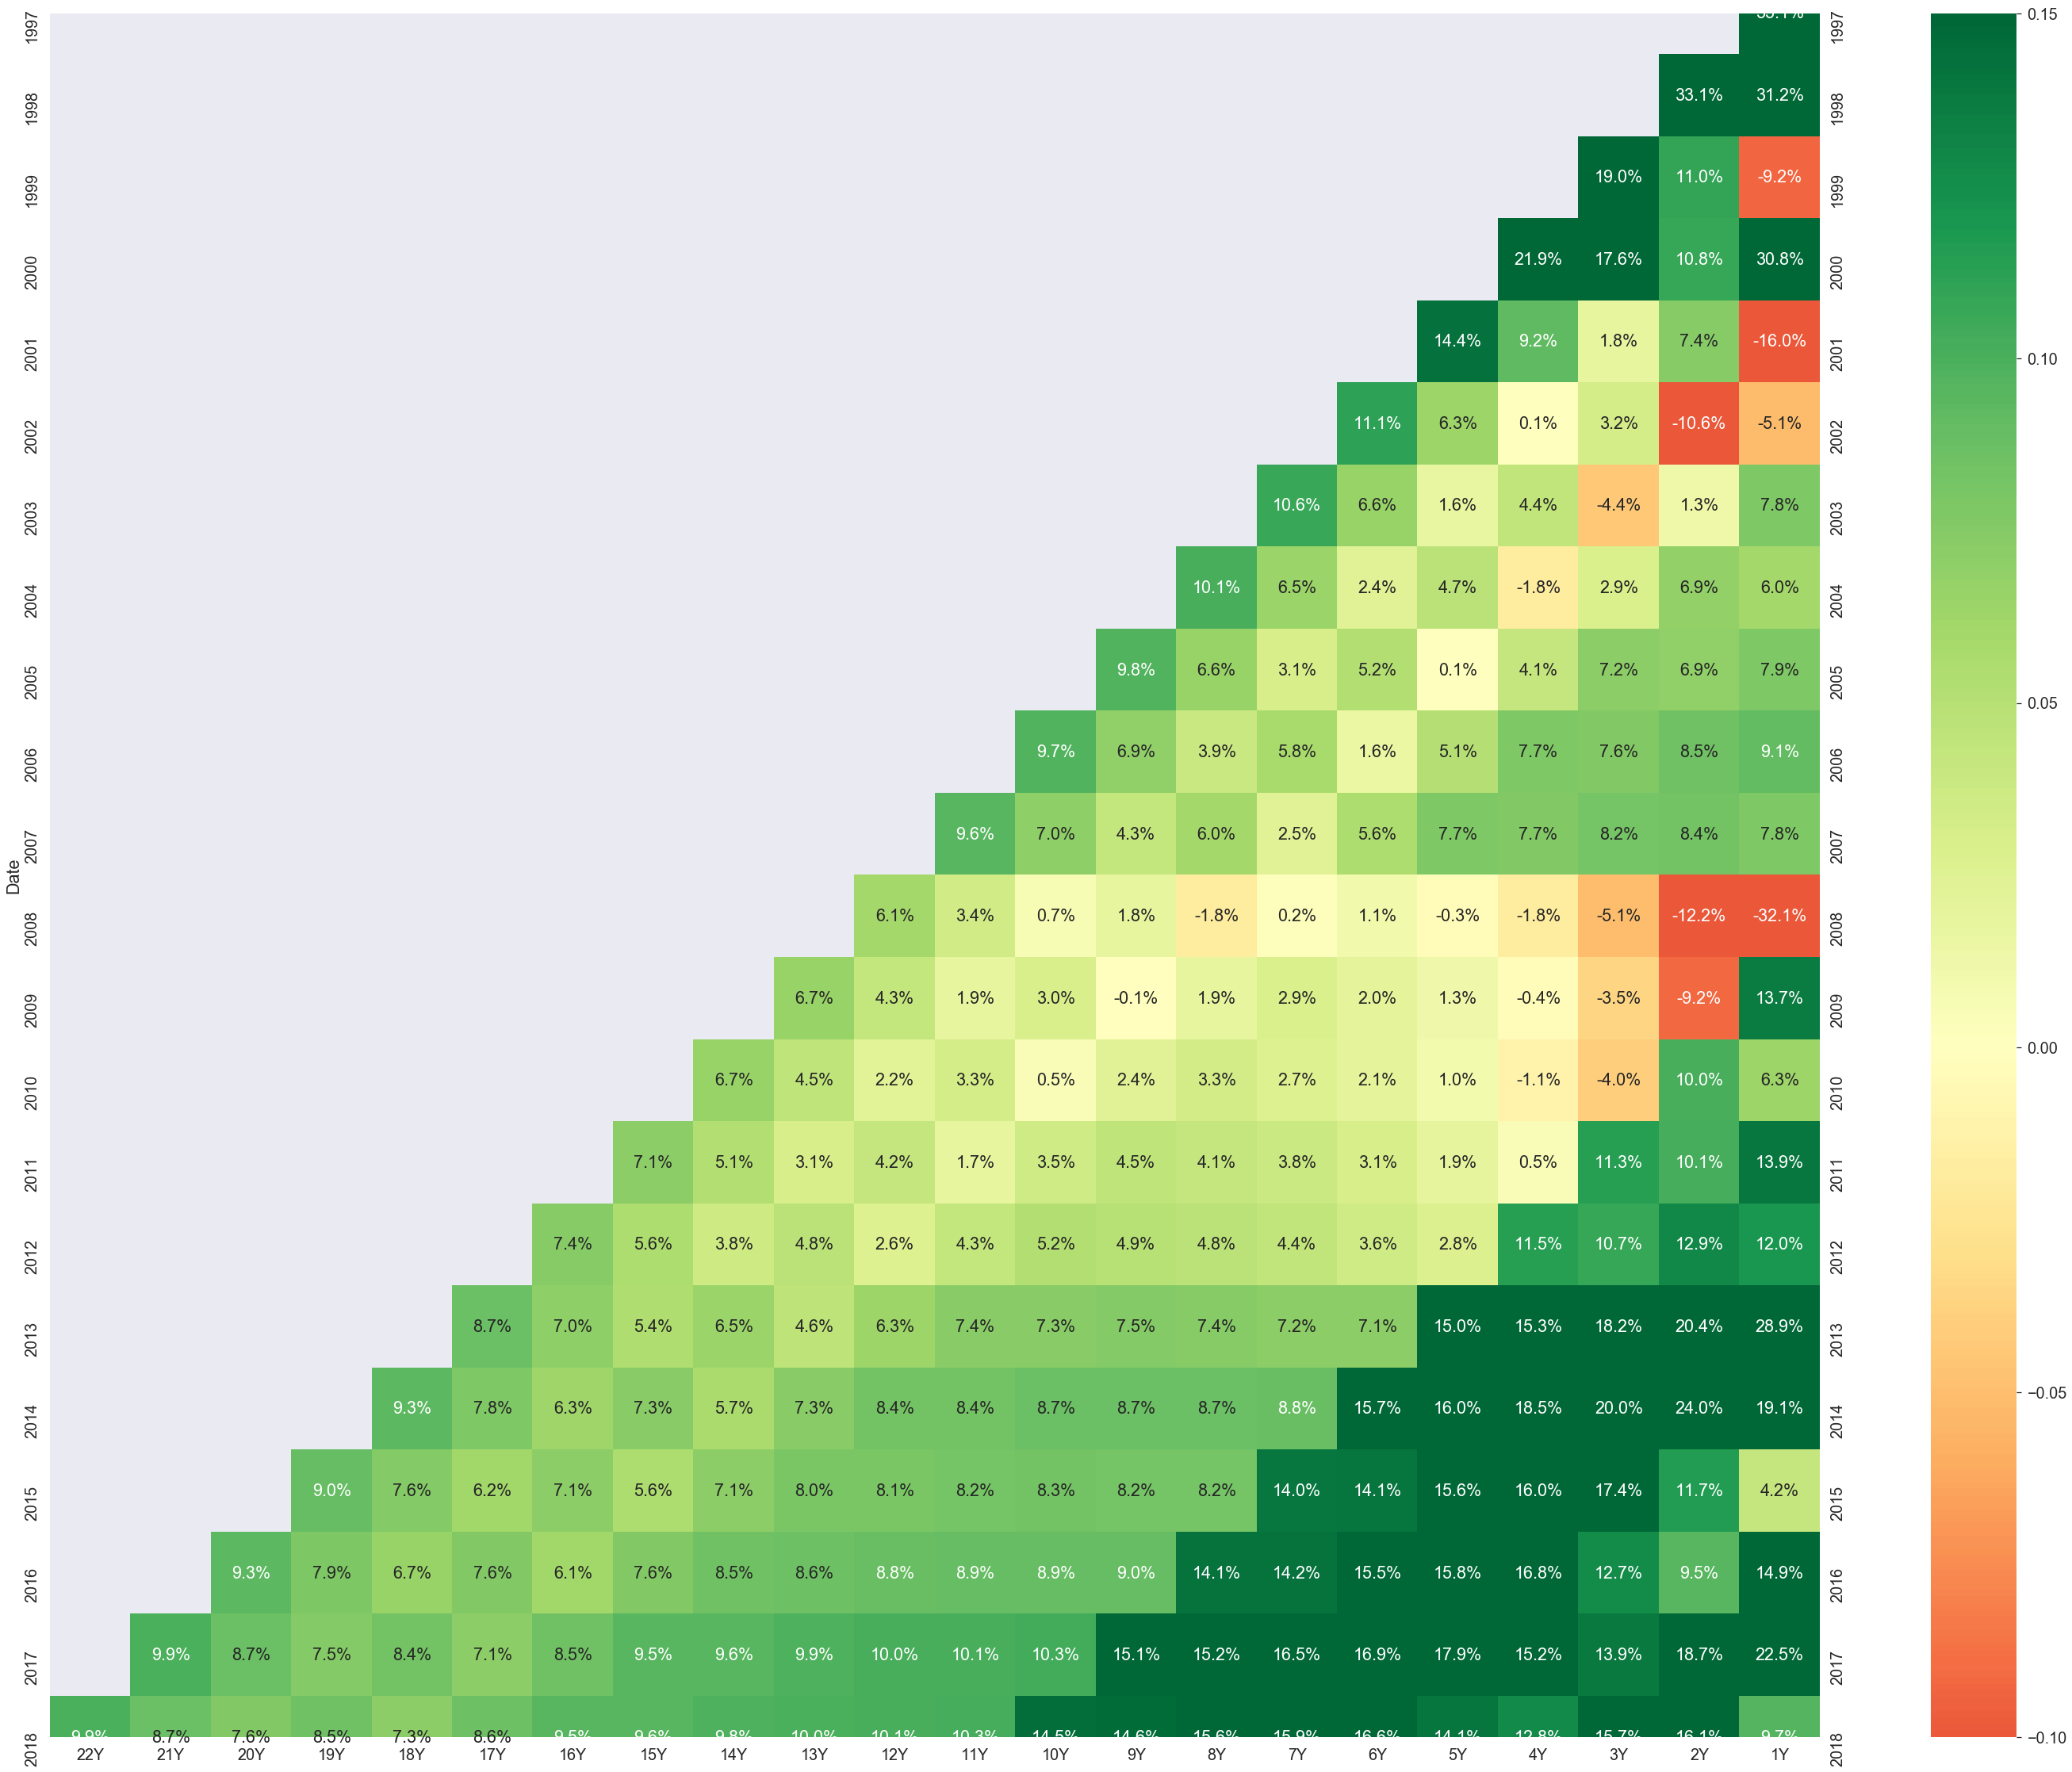

In [38]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn",
           vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright = True)
plt.show()

--------------------

### Step 4: Analyze and compare the performance of her Large-Cap Health Care Portfolio with other sectors for the most recent 4-years period from 2015 until 2018. Provide Mary with an interactive normalized Price Chart where she can play around!

In [39]:
hea_index

Date
1996-12-31   100.000
1997-01-02    99.819
1997-01-03   101.552
1997-01-06   101.743
1997-01-07   102.111
               ...  
2018-12-21   868.100
2018-12-24   845.380
2018-12-26   877.879
2018-12-27   885.269
2018-12-28   887.293
Length: 5536, dtype: float64

In [40]:
indexes = pd.read_csv("sector_indexes.csv", parse_dates = ["Date"], index_col = "Date")

In [41]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation
Date,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214


In [42]:
indexes["Health_Care"] = hea_index

In [43]:
indexes.tail()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2018-12-21,128.294,160.672,133.393,113.838,289.218,107.971,120.017,140.647,183.125,124.313,868.100
2018-12-24,124.953,155.393,126.147,111.800,282.379,104.768,117.474,135.757,181.658,120.440,845.380
2018-12-26,128.938,162.756,130.800,114.004,306.694,110.009,122.321,138.186,193.632,127.236,877.879
2018-12-27,129.375,164.573,132.960,114.604,305.869,110.509,122.838,139.407,194.367,128.281,885.269
2018-12-28,128.764,164.615,133.080,115.079,308.736,110.203,123.067,139.821,193.191,127.699,887.293


In [46]:
indexes.Health_Care = indexes.Health_Care.div(indexes.Health_Care[0]).mul(100)

In [47]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.961
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.554
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.855
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.280


In [48]:
indexes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2014-12-31 to 2018-12-28
Data columns (total 11 columns):
Basic Industries         1006 non-null float64
Capital Goods            1006 non-null float64
Consumer Durables        1006 non-null float64
Consumer Non-Durables    1006 non-null float64
Consumer Services        1006 non-null float64
Energy                   1006 non-null float64
Finance                  1006 non-null float64
Public Utilities         1006 non-null float64
Technology               1006 non-null float64
Transportation           1006 non-null float64
Health_Care              1006 non-null float64
dtypes: float64(11)
memory usage: 134.3 KB


In [49]:
import cufflinks as cf

In [52]:
indexes.iplot()

--------------------

### Step 5: Compare annualized risk and return based on daily (simple) returns and create an appropriate plot! Calculate the Sharpe Ratio and compare! 

(In terms of Sharpe Ratio, how did Mary´s Portfolio perform compared to the other Indexes?)

Hint: Assume a risk-free Return of 1.3% p.a.

In [53]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.961
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.554
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.855
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.280


In [54]:
ret = indexes.pct_change().dropna()

In [55]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [57]:
summary = ann_risk_return(ret)

In [58]:
summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


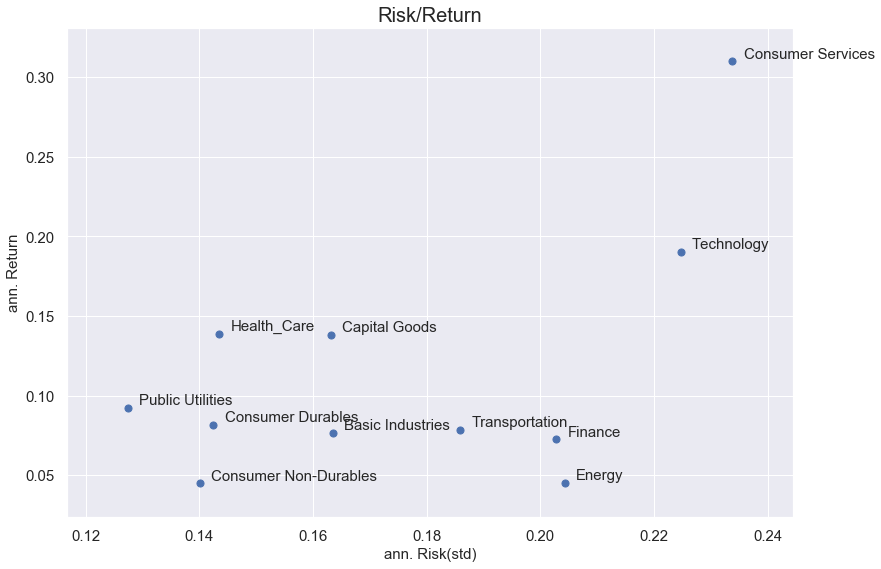

In [59]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

--------------------

In [63]:
rf = [0.013, 0]
rf

[0.013, 0]

In [64]:
summary["Sharpe"] = (summary.Return - rf[0]) / summary.Risk

In [65]:
summary.sort_values("Sharpe", ascending = False)

,Return,Risk,Sharpe
Consumer Services,0.310,0.234,1.271
Health_Care,0.139,0.143,0.878
Technology,0.190,0.225,0.789
Capital Goods,0.138,0.163,0.768
Public Utilities,0.092,0.127,0.621
Consumer Durables,0.082,0.142,0.483
Basic Industries,0.077,0.163,0.390
Transportation,0.079,0.186,0.353
Finance,0.073,0.203,0.294
Consumer Non-Durables,0.045,0.140,0.229


###  Step 6:  Show Mary that she could have improved the Sharpe Ratio of her Portfolio by adding other Sectors, without increasing the Total Risk of her Portfolio! Educate her on the Portfolio Diversification Effect!

In [66]:
ret.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027


In [67]:
noa = len(ret.columns)
noa

11

In [68]:
nop = 50000

In [69]:
np.random.seed(111)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [70]:
weights = matrix / matrix.sum(axis = 1, keepdims = True)

In [71]:
weights.shape

(50000, 11)

In [72]:
weights

array([[0.13785123, 0.03807189, 0.09819373, ..., 0.05374751, 0.07603494,
        0.22309308],
       [0.04681619, 0.01598951, 0.13186639, ..., 0.17739217, 0.15635744,
        0.16553591],
       [0.12969312, 0.15765315, 0.09183974, ..., 0.13001331, 0.11100301,
        0.08993248],
       ...,
       [0.11569744, 0.09323125, 0.08836689, ..., 0.09080952, 0.11341557,
        0.06591838],
       [0.20231586, 0.13734279, 0.09988422, ..., 0.06725256, 0.12817164,
        0.08679184],
       [0.13898176, 0.0131797 , 0.07500721, ..., 0.16656342, 0.01204152,
        0.09847087]])

In [73]:
port_ret = ret.dot(weights.T)

In [74]:
port_ret.head()

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.003,-0.003,-0.003,-0.001,-0.002,-0.002,-0.002,-0.001,-0.000,-0.002,...,-0.001,-0.001,-0.003,-0.003,-0.001,-0.002,-0.000,-0.002,-0.002,-0.003
2015-01-05,-0.014,-0.018,-0.017,-0.018,-0.020,-0.023,-0.019,-0.019,-0.022,-0.021,...,-0.020,-0.018,-0.016,-0.018,-0.018,-0.021,-0.018,-0.020,-0.018,-0.019
2015-01-06,-0.003,-0.008,-0.009,-0.008,-0.006,-0.010,-0.006,-0.011,-0.012,-0.010,...,-0.010,-0.006,-0.008,-0.006,-0.008,-0.008,-0.011,-0.011,-0.007,-0.006
2015-01-07,0.012,0.009,0.011,0.012,0.011,0.009,0.011,0.011,0.009,0.009,...,0.009,0.011,0.010,0.012,0.012,0.009,0.008,0.010,0.010,0.009
2015-01-08,0.018,0.018,0.017,0.018,0.015,0.020,0.017,0.019,0.017,0.016,...,0.016,0.018,0.017,0.016,0.019,0.016,0.015,0.017,0.017,0.016


In [75]:
port_summary = ann_risk_return(port_ret)

In [76]:
port_summary

,Return,Risk
0,0.110,0.122
1,0.115,0.133
2,0.119,0.133
3,0.121,0.133
4,0.119,0.132
...,...,...
49995,0.114,0.134
49996,0.116,0.132
49997,0.126,0.139
49998,0.099,0.130


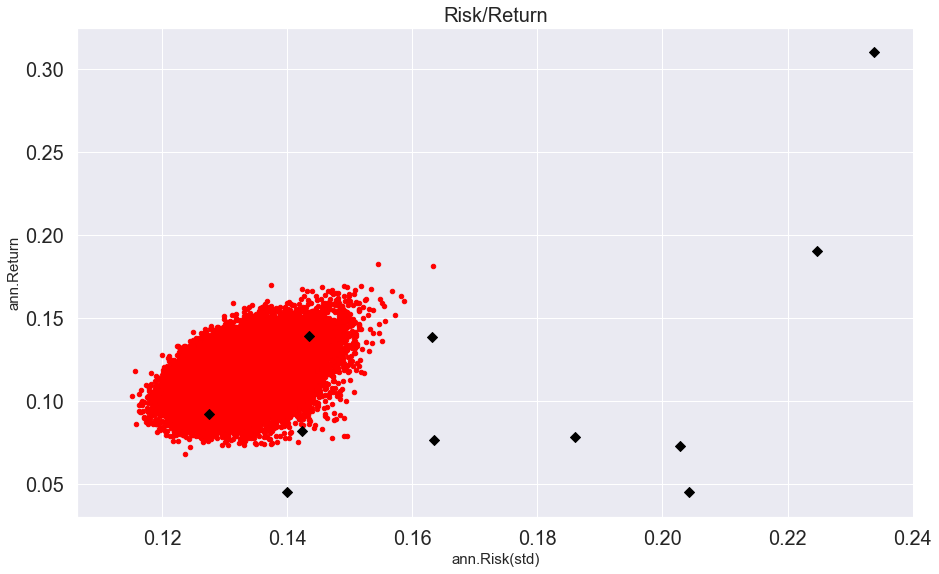

In [78]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s = 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s = 50, color = "black", marker = "D")
plt.xlabel("ann.Risk(std)", fontsize = 15)
plt.ylabel("ann.Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [79]:
port_summary["Sharpe"] = (port_summary.Return - rf[0]) / port_summary.Risk

In [80]:
port_summary

,Return,Risk,Sharpe
0,0.110,0.122,0.797
1,0.115,0.133,0.769
2,0.119,0.133,0.794
3,0.121,0.133,0.811
4,0.119,0.132,0.800
...,...,...,...
49995,0.114,0.134,0.757
49996,0.116,0.132,0.777
49997,0.126,0.139,0.814
49998,0.099,0.130,0.663


In [81]:
port_summary.describe()

,Return,Risk,Sharpe
count,50000.000,50000.000,50000.000
mean,0.115,0.132,0.774
std,0.014,0.005,0.092
min,0.068,0.115,0.440
25%,0.106,0.129,0.710
50%,0.115,0.132,0.776
75%,0.125,0.136,0.840
max,0.182,0.163,1.141


In [82]:
msrp = port_summary.describe()

In [83]:
msrp = port_summary.Sharpe.idxmax()
msrp

46957

In [84]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.170
Risk     0.137
Sharpe   1.141
Name: 46957, dtype: float64

In [85]:
summary

,Return,Risk,Sharpe
Basic Industries,0.077,0.163,0.390
Capital Goods,0.138,0.163,0.768
Consumer Durables,0.082,0.142,0.483
Consumer Non-Durables,0.045,0.140,0.229
Consumer Services,0.310,0.234,1.271
Energy,0.045,0.204,0.158
Finance,0.073,0.203,0.294
Public Utilities,0.092,0.127,0.621
Technology,0.190,0.225,0.789
Transportation,0.079,0.186,0.353


In [86]:
msrp_w = weights[msrp, :]
msrp_w

array([0.13014365, 0.04369762, 0.09228104, 0.00534677, 0.28593317,
       0.00373666, 0.0099978 , 0.10496562, 0.05529165, 0.01815424,
       0.25045178])

In [87]:
pd.Series(index = indexes.columns, data = msrp_w)

Basic Industries        0.130
Capital Goods           0.044
Consumer Durables       0.092
Consumer Non-Durables   0.005
Consumer Services       0.286
Energy                  0.004
Finance                 0.010
Public Utilities        0.105
Technology              0.055
Transportation          0.018
Health_Care             0.250
dtype: float64

In [ ]:

plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

--------------------

### Step 7: Identify Sectors with positive Alpha and a Beta-Factor < 1. Which Sectors will be added to Mary´s Portfolio?

Hint: Use the S&P 500 Total Return Index as Market Portfolio (SP500_TR.csv). Calculate the following Metrics for the Sector Indexes and the Market Portfolio:
- Annualized Risk and Return (daily simple Returns)
- Sharpe Ratio
- Annualized Total Risk in Variance units
- Systematic Risk
- Unsystematic Risk
- Beta
- CAPM Return
- Alpha

In [88]:
ret.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027


In [89]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.961
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.554
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.855
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.280


In [90]:
SP500 = pd.read_csv("SP500_TR.csv", parse_dates = ["Date"], index_col = "Date")["Close"]

In [91]:
SP500 = SP500.reindex(indexes.index)

In [92]:
ret_SP = SP500.pct_change().dropna()

In [93]:
ret_SP.head()

Date
2015-01-02   -0.000
2015-01-05   -0.018
2015-01-06   -0.009
2015-01-07    0.012
2015-01-08    0.018
Name: Close, dtype: float64

In [94]:
ret["SP500"] = ret_SP

In [95]:
ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care,SP500
Date,,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004,-0.018
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003,-0.009
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014,0.012
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010,-0.021
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026,-0.027
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038,0.050


In [96]:
summary = ann_risk_return(ret)

In [97]:
summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


In [98]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [99]:
COV = ret.cov()*252

In [100]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [101]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [102]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032
Energy,0.045,0.204,0.158,0.042,0.020,0.022
Finance,0.073,0.203,0.294,0.041,0.022,0.019
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007
Technology,0.190,0.225,0.789,0.050,0.022,0.029
Transportation,0.079,0.186,0.353,0.035,0.019,0.016


In [103]:
summary["beta"] = summary.SystRisk_var / summary.loc["SP500", "SystRisk_var"]

In [104]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007,1.042
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008,0.623
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032,1.205
Energy,0.045,0.204,0.158,0.042,0.020,0.022,1.052
Finance,0.073,0.203,0.294,0.041,0.022,0.019,1.164
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470
Technology,0.190,0.225,0.789,0.050,0.022,0.029,1.177
Transportation,0.079,0.186,0.353,0.035,0.019,0.016,1.020


In [105]:
summary["capm_ret"] = rf[0] + (summary.loc["SP500", "Return"] - rf[0]) * summary.beta

In [106]:
summary["alpha"] = summary.Return - summary.capm_ret

In [107]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007,1.042,0.080,0.058
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008,0.623,0.053,-0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032,1.205,0.090,0.220
Energy,0.045,0.204,0.158,0.042,0.020,0.022,1.052,0.081,-0.035
Finance,0.073,0.203,0.294,0.041,0.022,0.019,1.164,0.088,-0.015
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Technology,0.190,0.225,0.789,0.050,0.022,0.029,1.177,0.089,0.102
Transportation,0.079,0.186,0.353,0.035,0.019,0.016,1.020,0.079,0.000


In [108]:
summary.loc[(summary.alpha > 0) & (summary.beta < 1)]

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Health_Care,0.139,0.143,0.878,0.021,0.016,0.005,0.835,0.067,0.072
